# Classification analysis

## Iris dataset

**Import of the libraries useful for the analysis**

In [1]:
# pandas -> read input file and data manipulation
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)

# numpy -> array manipulations
import numpy as np
np.set_printoptions(suppress=True)

# pandas, matplotlib & seaborn -> plotting
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

# custom script to plot decision boundaries
from decision_regions import plot_decision_regions

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# show sklearn objects in diagram
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

# warnings -> to silence warnings
from warnings import filterwarnings
filterwarnings("ignore")

**Load the iris dataset informations**  
The iris dataset contains the sepal and petal dimension about flowers of the iris species.

In [2]:
dataset = load_iris()

print(dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Load the iris data**  
We can load the iris dataset using the function ```load_iris``` of scikit-learn and setting the parameter ```return_X_y``` to True.

In [3]:
X, y = load_iris(return_X_y=True)

**Inspect the X and y objects**  
The X and y variables are numpy arrays.

In [4]:
print(f"X -> type object: {type(X)}, shape: {X.shape}")
print(f"y -> type object: {type(y)}, shape: {y.shape}")

X -> type object: <class 'numpy.ndarray'>, shape: (150, 4)
y -> type object: <class 'numpy.ndarray'>, shape: (150,)


**Convert the arrays to pandas dataframe**  
To semplify the analysis, we create a dataframe with the data of ```X``` and ```y```.

NB is possible to directly obtain the pandas dataframe using the code: ```load_iris(as_frame=True)["frame"]```

In [5]:
data = np.c_[X, y]
columns = dataset["feature_names"] + ["species"]

df = pd.DataFrame(data=data, columns=columns)

**Copy of the dataframe**

In [6]:
df_ = df.copy()

**Name of the columns/variables**  
The dataset contains 5 columns: sepal length, sepal width, petal length, petal width and species.

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

**Shape of the dataframe**  
The dataframe is composed by 150 and 5 columns.

In [8]:
df.shape

(150, 5)

**Show 10 random observations**  
We have only numerical values (type ```float```)

In [9]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.80,2.70,5.10,1.90,2.00
4,5.00,3.60,1.40,0.20,0.00
111,6.40,2.70,5.30,1.90,2.00
8,4.40,2.90,1.40,0.20,0.00
101,5.80,2.70,5.10,1.90,2.00
30,4.80,3.10,1.60,0.20,0.00
96,5.70,2.90,4.20,1.30,1.00
86,6.70,3.10,4.70,1.50,1.00
35,5.00,3.20,1.20,0.20,0.00
105,7.60,3.00,6.60,2.10,2.00


**Informations about missing values and variable types**  
The variables doesn't have any missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


**Statistical informations about numerical variables**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
sepal width (cm),150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40
petal length (cm),150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90
petal width (cm),150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50
species,150.00,1.00,0.82,0.00,0.00,1.00,2.00,2.00


**To semplify the explorative analysis, we map the species values with their string label**

In [12]:
map_species = {
    0: "setosa",
    1: "versicolour",
    2: "virginica"
}

df["species"] = df["species"].map(map_species)

**We use a pairplot to have a visual overview of the relationship between the variables**

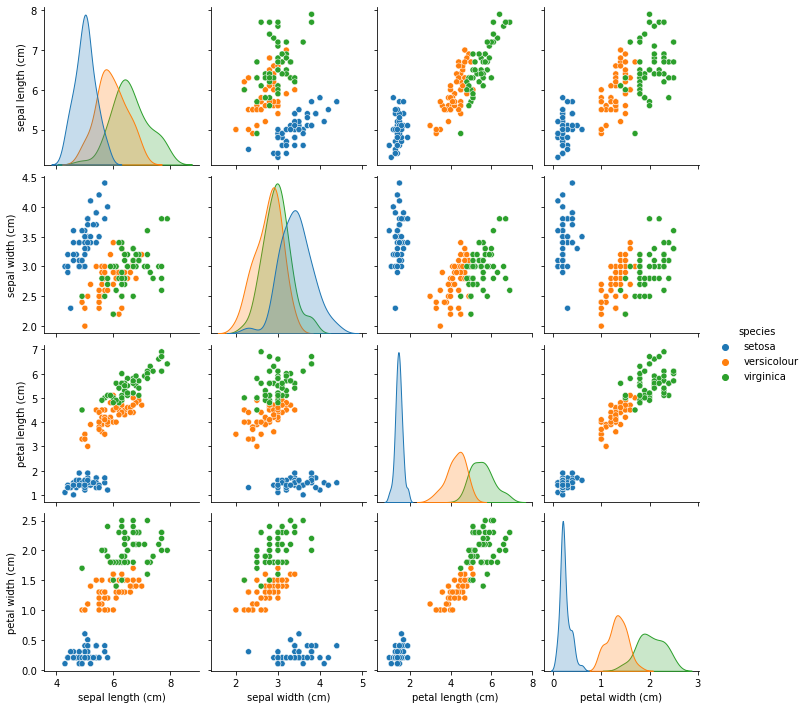

In [13]:
sns.pairplot(data=df, hue="species")
plt.show()

**Computing the correlations among variables**

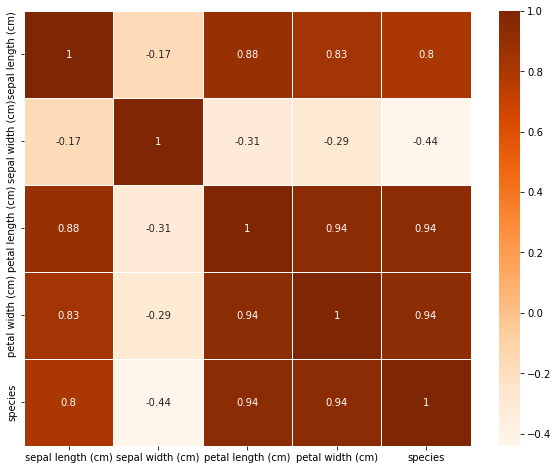

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_.corr(method="spearman"), cmap="Oranges", annot=True,  linewidths=1, linecolor="white")
plt.show()

**Boxplots of every feature discriminating by species**

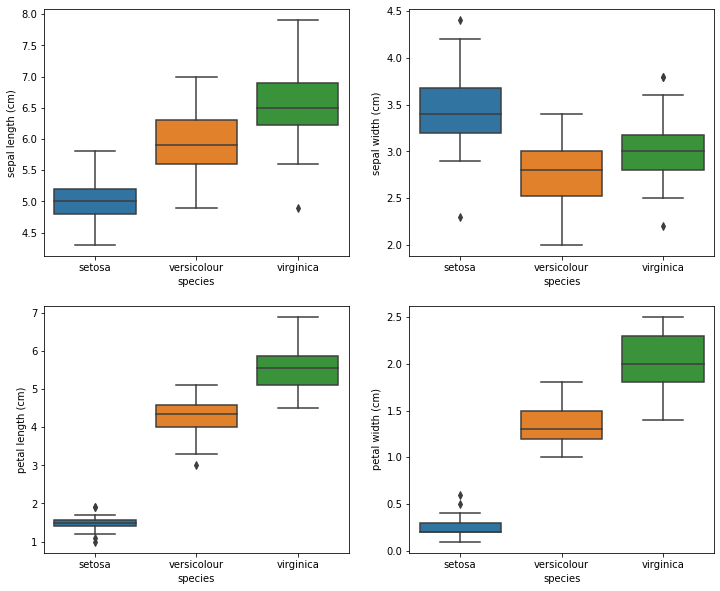

In [15]:
fig = plt.figure(figsize=(12, 10))
axes = fig.subplots(nrows=2, ncols=2)
for ax, column in zip(axes.flat, df.columns[:-1]):
    sns.boxplot(x="species", y=column, data=df, ax=ax)

**Kernel density estimation plot of the sepal length and width for each species**

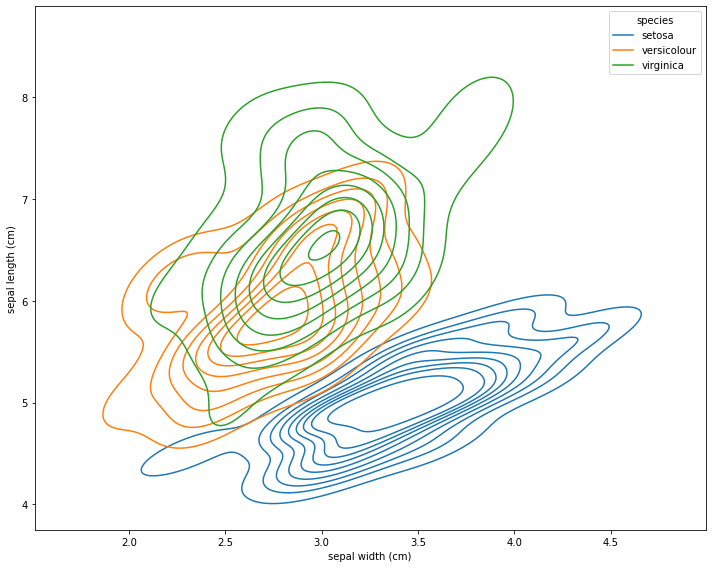

In [16]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x="sepal width (cm)", y="sepal length (cm)", data=df, hue="species")
plt.tight_layout()
plt.show()

**Multivariate plot: parallel coordinates**  
To show a set of points in an n-dimensional space, a backdrop is drawn consisting of n parallel lines, typically vertical and equally spaced. A point in n-dimensional space is represented as a polyline with vertices on the parallel axes; the position of the vertex on the i-th axis corresponds to the i-th coordinate of the point.

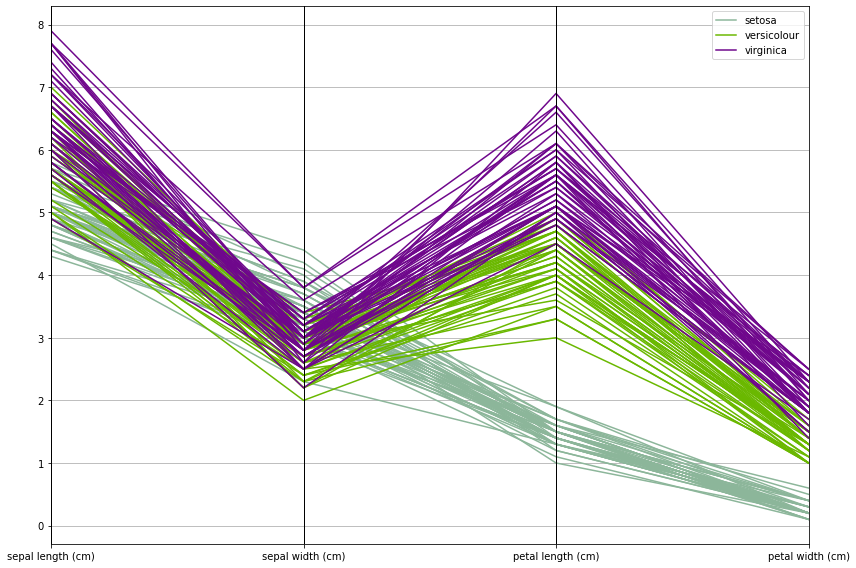

In [17]:
plt.figure(figsize=(12, 8))
parallel_coordinates(df, class_column="species")
plt.tight_layout()
plt.show()

### Classification analysis  
As we can see from the plot below, we are in a classification problem and the categories of the target variable are perfectly balanced ([Thanos](https://i.imgflip.com/303krn.jpg) love this).

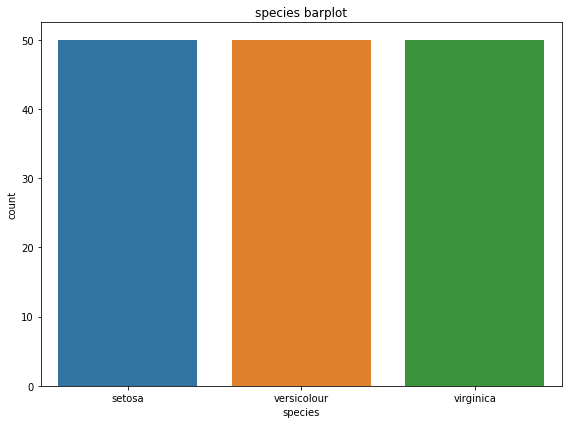

In [18]:
plt.figure(figsize=(8, 6))
plt.title(label="species barplot")
sns.countplot(x="species", data=df)
plt.tight_layout()
plt.show()

### Classification problems
**Why don't use a regression model.**

To semplify the problem, we divide the target variable into 'setosa' (value zero) and 'no-setosa' (value one).

In [19]:
df["species bin"] = np.where(df["species"] == "setosa", 0, 1)

**Definition of the X and y variables**  
Looking at the plots, the petal length (cm) variable looks the most interesting to use for a one-feature model.

In [20]:
X = df[["petal length (cm)"]].values
y = df["species bin"].values

**Split the dataset into training and test set**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Definition of the linear regression model object and fit to the data**

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

**Compute the predictions**

In [23]:
y_pred = lr.predict(X_test)

print(y_pred)

[0.90923554 0.16159176 1.45750764 0.85939262 0.93415699 0.11174884
 0.63509949 1.00892137 0.85939262 0.70986386 1.00892137 0.08682739
 0.06190593 0.11174884 0.11174884 0.90923554 1.18337159 0.70986386
 0.85939262 1.13352867 0.1366703  0.95907845 0.1366703  1.13352867
 1.33290034 1.03384283 1.18337159 1.20829304 0.08682739 0.1366703 ]


**Plot of the regression line**  
In classification problems, the regression models are not very useful because we are tipically interested to know the probability to have a specific class category. As we can see from the plot below, the regression models returns values lower than 0 and greater than 1, and this give many problems in the interpretation of the results.

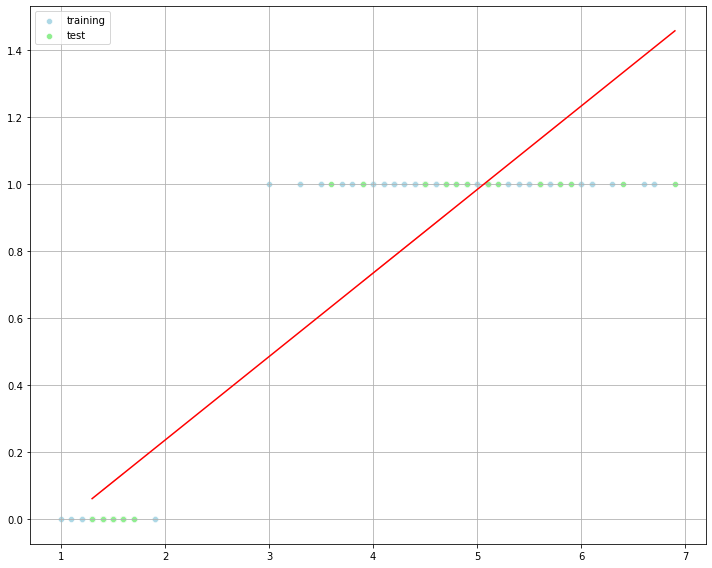

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.flatten(), y=y_train, color="lightblue", label="training")
sns.scatterplot(x=X_test.flatten(), y=y_test, color="lightgreen", label="test")
sns.lineplot(x=X_test.flatten(), y=y_pred, color="red")
plt.grid()
plt.tight_layout()
plt.show()

### Logistic Regression
The logistic regression is a binary classifier that bypasses the problems described above, modeling the probability that y belongs to certain category.
In practice, the logistic regression propose a model to estimate the probability to having a $y=1$ given an $X$ predictor.

$P(X)=P(Y=1|X)$

To compute this probabilities, the logistic regression uses a sigmoid function, a mathematical function having a "S"-shaped curve that can be written as:

$P(t)=\frac{1}{1 + e^{-t}}=\frac{e^{t}}{1+e^{t}}$

<img src=https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png width="700">

So this model uses the sigmoid function to create the logistic function where $\beta_0$ and $\beta_1$ are always the intercept and the coefficient:

$ P(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} $

Manipulating the formula we obtain:

$ p(X) + p(X) * e^{\beta_0+\beta_1X} = e^{\beta_0+\beta_1X} $

And:

$ P(X) = (1-p(X)) * e^{\beta_0+\beta_1X} $

Simplifying, the result is:

$ \frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X} $


Where the quantity $p(X)/[1-p(X)]$ is called odds, that can assume values in the range 0, +∞. From the natural logarithm of the odds is possible to obtain the logit (or log-odds):

$ log(\frac{p(X)}{1-p(X)})=\beta_0+\beta_1X $

The logit is linear in X, so in the logistic regression model the coefficient of $\beta_1$ is related to the variation of the logit and not to the variation of the probability.

Given this features, the logistic regression is known as a generalized linear model (GLM) and there is the implementation available in scikit-learn.  
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Definition of the model**

In [25]:
lr = LogisticRegression()

**Fit of the model to the data**

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Check the attributes of the model**  
During the fit of to the data, also the ```LogisticRegression``` model computes the parameters to build his function, that are the intercept and the coefficient. So the model has the attributes ```intercept_``` and ```coef_``` that can we call just like in the linear regression.

**Given the formula of the logistic regression model:**

$P(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$

**With the intercept and coef values, we can build the logistic regression function:**

$P(X)=\frac{e^{-7.5131953+2.78437328}}{1+e^{-7.5131953+2.78437328}}$

**How this parameters are estimated?**  
Also in the logistic regression model the parameters are estimated using the gradient descent, but using the maximum likehood estimation. So, during the training phase, the algorithm maximize the following log likehood function (LLF):

$LLF = Σᵢ(y_i log(p(x_i)) + (1−y_i) log(1−p(x_i)))$

Since we are searching a maximum, in this case the computation uses always a gradient descent using the negative of maximum likehood estimation.  

**Interpret the probabilities of the logistic regression**  
The probabilities computed from the logistic regression model are expressed in log-odds. Let’s say that the probability of success of some event is 0.8, then the probability of failure is 1–0.8=0.2. The odds of success are defined as the ratio of the probability of success over the probability of failure. In our example, the odds of success are 0.8/0.2 = 4, that is to say that the odds of success are  4 to 1. If the probability of success is 0.5 then the odds of success is 1 to 1. The transformation from odds to log of odds is the log transformation. That is to say, the greater the odds, the greater the log of odds and vice versa.

**Table of conversion from probabilities to logodds**  
As we can see from the conversion table, a probability of 50% is corrispondent to a log-odd value of 0 whereas for probabilities lower or upper correspond a log-odd value negative or positive.  

| p      | odds      | log-odds   |
|--------|-----------|------------|
| 0.001  | 0.001001  | -6.906755  |
| 0.01   | 0.010101  | -4.59512   |
| 0.15   | 0.1764706 | -1.734601  |
| 0.2    | 0.25      | -1.386294  |
| 0.25   | 0.3333333 | -1.098612  |
| 0.3    | 0.4285714 | -0.8472978 |
| 0.35   | 0.5384616 | -0.6190392 |
| 0.4    | 0.6666667 | -0.4054651 |
| 0.45   | 0.8181818 | -0.2006707 |
| 0.5    | 1         |  0         |
| 0.55   | 1.222222  |  0.2006707 |
| 0.6    | 1.5       |  0.4054651 |
| 0.65   | 1.857143  |  0.6190392 |
| 0.7    | 2.333333  |  0.8472978 |
| 0.75   | 3         |  1.098612  |
| 0.8    | 4         |  1.386294  |
| 0.85   | 5.666667  |  1.734601  |
| 0.9    | 9         |  2.197225  |
| 0.999  | 999       |  6.906755  |
| 0.9999 | 9999      |  9.21024   |

**Interpretation of the intercept and coefficient**  
* The value of the intercept, tell us which is the probability (in log-odds) of having a $y=1$ with $x_1=0$. Remember that negative probabilities don't exists, so the value correspond to a very low probability to have setosa.
* The value of the coefficient indicates the change of probability given a increase of 1 unit of petal length. In this case, we have an increasing of probability to have no-setosa for an increasing value of $x_1$

In [28]:
lr.intercept_, lr.coef_

(array([-7.5131953]), array([[2.78437328]]))

**Compute the baseline probability to have a no-setosa species with petal length value of 0**

In [29]:
np.exp(lr.intercept_ + lr.coef_ * 0) / (1 + np.exp(lr.intercept_ + lr.coef_ * 0))

array([[0.00054554]])

****

**Computing probabilities for each species category**  
The logistic regression model has the attribute ```predict_proba``` to compute the probability for each species category. The value returned by the method is a numpy array containing for each observation the probability to have 0 (first column) and 1 (second column).

NB in this case, the values returned from the model are probabilities

In [30]:
y_pred_proba = lr.predict_proba(X_test)

print(y_pred_proba)

[[0.00378333 0.99621667]
 [0.94157228 0.05842772]
 [0.0000083  0.9999917 ]
 [0.00658415 0.99341585]
 [0.00286649 0.99713351]
 [0.96566446 0.03433554]
 [0.07512199 0.92487801]
 [0.00124533 0.99875467]
 [0.00658415 0.99341585]
 [0.03403098 0.96596902]
 [0.00124533 0.99875467]
 [0.97379046 0.02620954]
 [0.98003309 0.01996691]
 [0.96566446 0.03433554]
 [0.96566446 0.03433554]
 [0.00378333 0.99621667]
 [0.00017753 0.99982247]
 [0.03403098 0.96596902]
 [0.00658415 0.99341585]
 [0.00030979 0.99969021]
 [0.95513514 0.04486486]
 [0.00217135 0.99782865]
 [0.95513514 0.04486486]
 [0.00030979 0.99969021]
 [0.0000334  0.9999666 ]
 [0.00094296 0.99905704]
 [0.00017753 0.99982247]
 [0.00013439 0.99986561]
 [0.97379046 0.02620954]
 [0.95513514 0.04486486]]


**Linear Regression vs Logistic Regression**  
Unlike the linear regression, the logistic regression function returns values in the range [0,1].

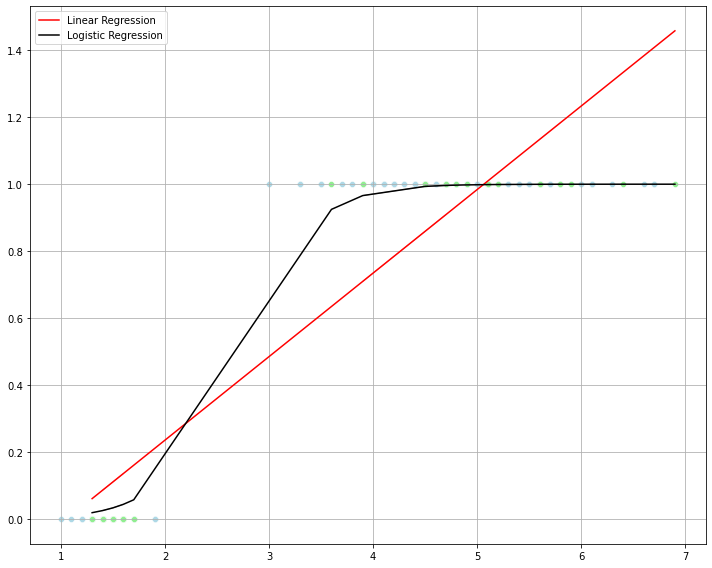

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.flatten(), y=y_train, color="lightblue")
sns.scatterplot(x=X_test.flatten(), y=y_test, color="lightgreen")
sns.lineplot(x=X_test.flatten(), y=y_pred, color="red", label="Linear Regression")
sns.lineplot(x=X_test.flatten(), y=y_pred_proba[:, 1], color="black", label="Logistic Regression")
plt.grid()
plt.tight_layout()
plt.show()

**Comparing the functions of having a setosa and no-setosa species**  
As we can see from the plot, for values greater than 2.68 the predicted label is 1 (no-setosa), else 0 (setosa).

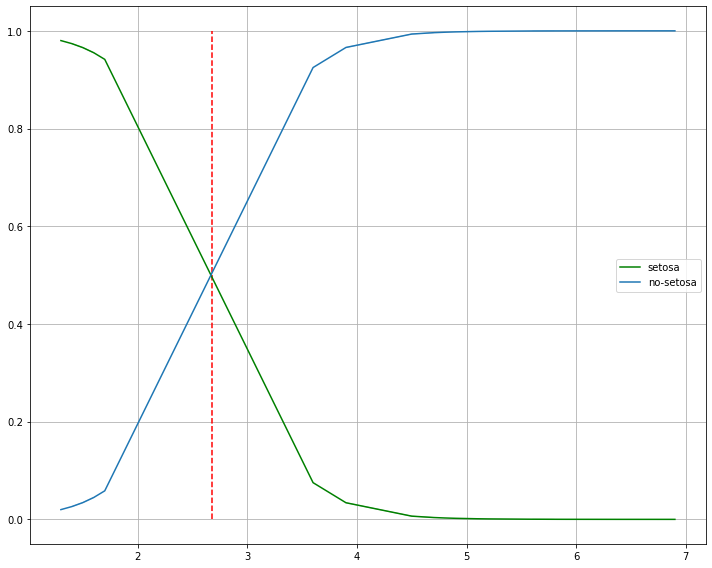

In [32]:
plt.figure(figsize=(10, 8))
sns.lineplot(X_test.flatten(), y_pred_proba[:, 0], color="green", label="setosa")
sns.lineplot(X_test.flatten(), y_pred_proba[:, 1], label="no-setosa")
plt.vlines(x=2.68, ymin=0, ymax=1, color="red", linestyles="dashed")
plt.grid()
plt.tight_layout()
plt.show()

**Decision boundary**  
It provides a diagnostic tool for understanding a model on a classification predictive modeling task.

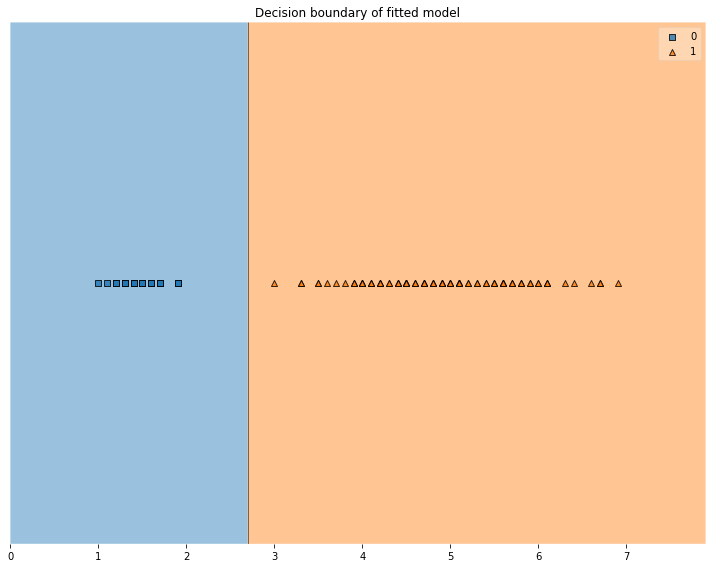

In [33]:
plt.figure(figsize=(10, 8))
plt.title("Decision boundary of fitted model")
plot_decision_regions(X=X, y=y, clf=lr)
plt.tight_layout()
plt.show()

**Compute the predictions**  
If the probability of having y=1 is greater of 0.5 the returned label is 1 else is 0.

In [34]:
y_pred = lr.predict(X_test)

print(y_pred)

[1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]


**Error metrics**  
In classification analysis we can't use the regression metrics, because we have a different nature of the target variable. To measure the prediction quality of the model in classification problems, one of the most used metrics is the accuracy. This metric computes the ratio of the right predictions where a value close to 1 indicates a better model.

**We can measure the accuracy score in two different ways:**
* calling the method ```score``` of the ```lr``` object
* using the ```accuracy_score``` function of scikit-learn  

The ```score``` method is faster to use, but if we have computed and stored the predictions, the use of the ```accuracy_score``` function is recommended

In [35]:
# using the method score
accuracy = lr.score(X_test, y_test)

print(accuracy)

1.0


In [36]:
# using the accuracy_score function
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
# we can multiply the returned value by 100 to have the percentage
print(f"{accuracy * 100}%")

100.0%


**Confusion matrix**  
In the main diagonal we have the values correctly predicted by the model

In [37]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[10,  0],
       [ 0, 20]])

**Plot of the confusion matrix**

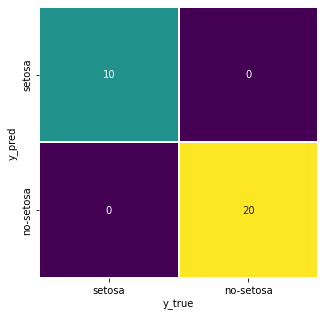

In [38]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

labels = ["setosa", "no-setosa"]

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, annot=True, cbar=False, linewidths=2, 
            xticklabels=labels, yticklabels=labels, cmap="viridis")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

### Multivariate logistic regression with 3 categories  
The logistic regression model is a binary classifier, however it can be generalized to handle multi-class problems (where the target variable contains more than two categories). The technique used in this case is called One vs Rest (or One vs All), and involves in training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label, because discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.

<img src=https://miro.medium.com/max/528/1*4xjYPBsT9ZHOe3u0MIRB2A.jpeg width=500>

Although this strategy is popular, it is a heuristic that suffers from several problems. Firstly, the scale of the confidence values may differ between the binary classifiers. Second, even if the class distribution is balanced in the training set, the binary classification learners see unbalanced distributions because typically the set of negatives they see is much larger than the set of positives.

**Convert to numeric the species variables**  
We are using the function ```select``` of numpy to make multiple assignments. In this case we are making the following conversion:
* setosa -> 0
* versicolour -> 1
* virginica -> 2

In [39]:
condlist = [(df["species"] == "versicolour"), (df["species"] == "virginica")]

df["species"] = np.select(condlist=condlist, choicelist=[1, 2], default=0)

**Definition of the X and y variables**  
Now we use the petal width variable too as predictor.

In [40]:
X = df[["petal length (cm)", "petal width (cm)"]].values
y = df["species"].values

**Split the dataset into training and test set**  
The parameter ```stratify=y``` allows to preserve the original structure of the data in the training and test set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**Definition of the model and fit to the data**  
During the fit phase, the model computes the number of categories in the target variable and manage automatically the multicategorical problems.

**Interpretation of the intercept and coefficient**  
Now we have three intercepts, one for each category. The interpretation of the intercept and coefficients is similar to the one used for binary problems. So, for the intercepts, we the three baseline probabilities (in log-odds) to have the expected category with the coefficient values equals to zero, whereas the coefficients interpretation is the same of the binary problem, except that the coefficients array are belonging to the relative intercept.

In [42]:
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lr.intercept_

array([ 10.41582694,   2.8335323 , -13.24935924])

abbiamo tre intercette, 10 è il log-odds(probabilità molto alta) della classe 0 quando i coefficienti delle altre classi sono zero (one vs all)

In [44]:
lr.coef_

array([[-2.57480323, -1.08787617],
       [ 0.11136326, -0.84266177],
       [ 2.46343997,  1.93053794]])

**Computing probabilities for each species category**  
Just like the binary model, for each test observation we have the probability associated with each class category.

In [45]:
y_pred_proba = lr.predict_proba(X_test)

print(y_pred_proba)

[[0.98272776 0.01727217 0.00000007]
 [0.00095309 0.39278639 0.60626051]
 [0.1778244  0.81898495 0.00319066]
 [0.1778244  0.81898495 0.00319066]
 [0.98272776 0.01727217 0.00000007]
 [0.00279894 0.6417958  0.35540527]
 [0.99220992 0.00779007 0.00000001]
 [0.95104961 0.04894991 0.00000048]
 [0.00016016 0.15518543 0.84465441]
 [0.0060231  0.78751176 0.20646513]
 [0.00000133 0.0235005  0.97649817]
 [0.00011522 0.09185557 0.90802921]
 [0.00000492 0.02508212 0.97491296]
 [0.0060231  0.78751176 0.20646513]
 [0.97080125 0.02919857 0.00000018]
 [0.97752486 0.02247503 0.00000011]
 [0.98674254 0.01325742 0.00000004]
 [0.03975875 0.94041419 0.01982706]
 [0.00346312 0.7560882  0.24044868]
 [0.0014278  0.44981093 0.54876127]
 [0.97080125 0.02919857 0.00000018]
 [0.00000738 0.02310286 0.97688976]
 [0.00513151 0.83568297 0.15918552]
 [0.00011212 0.27460707 0.72528081]
 [0.00001327 0.03955171 0.96043502]
 [0.00076597 0.40294352 0.5962905 ]
 [0.008784   0.85668485 0.13453114]
 [0.94989517 0.05010418 0.00

**Compute the predictions**  
For each observation is assigned the label with the highest probability.

In [46]:
y_pred = lr.predict(X_test)

print(y_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


**Decision boundary**  
As we can see from the plot, the model make some mistakes to distinguish between versicolour and virginica species, but it looks very precise overall.

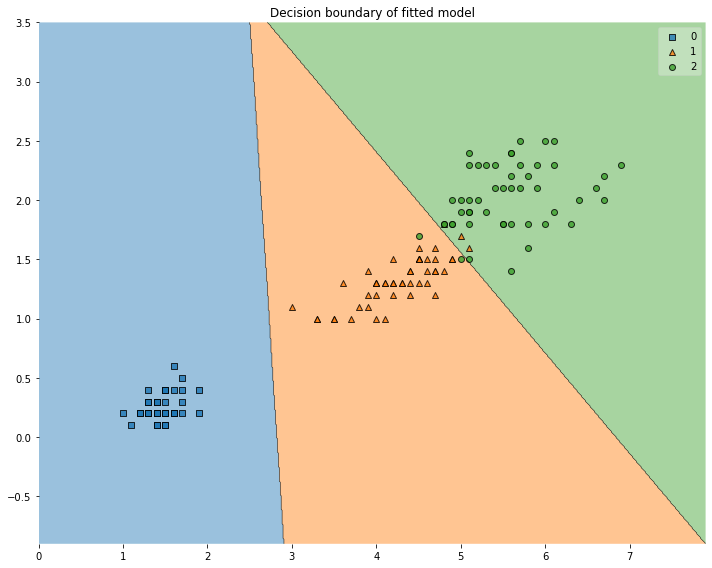

In [47]:
plt.figure(figsize=(10, 8))
plt.title("Decision boundary of fitted model")
plot_decision_regions(X=X, y=y, clf=lr)
plt.tight_layout()
plt.show()

**Compute the accuracy of the model**  
With a multicategorical target variable we obtained a ~96% of accuracy.

In [48]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print(accuracy)

0.9666666666666667


**Confusion matrix**  
Scikit-learn provides a function to plot the confusion matrix.

Definition of the function:
```python
plot_confusion_matrix(
    estimator,
    X,
    y_true,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format=None,
    cmap='viridis',
    ax=None,
)
```

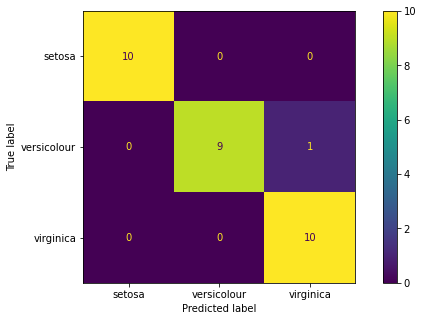

In [49]:
labels = ["setosa", "versicolour", "virginica"]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, display_labels=labels, ax=ax)
plt.show()

### <font color= "blue"> Logistic Regression model </font>
- **supervised model**: the data must have the target variable
- **parametric model**: make assumption of linearity among predictors and target variable

#### <font color= "green"> Pros: </font>
* Can be used with few data
* Computationally efficient
* Easy to interpret

#### <font color= "red"> Contros: </font>
* Make many assumptions about data
* Can't interpret non-linear relationships
* Sensitive to unbalanced classes

**Use when**: the target variable is discrete and there are evidence of a linear relationship among the feature/s and target variable.